Title: Perceptrons and Perceptron Learning Algorithm
Author: Thomas Breuel
Institution: UniKL

In [2]:


import scipy,pylab,numpy
from numpy import *
from scipy import *
from pylab import *
from urllib import urlopen
from gzip import GzipFile
from scipy.spatial import distance
from scipy.spatial.distance import cdist

Linear Classification Problem
==============================

Let's start by generating a simple linear classification problem.  That is, a problem in which the optimal decision boundary is known to be linear.  We're also generating a problem in which the samples are perfectly linearly separable.  This is the exception rather than the rule.

In a Bayesian framework, this means that $P(\omega|x)$ is either 0 or 1 for any $x$.




In [3]:
data = random_sample((100,2))
labels = (data[:,0]*0.7+data[:,1]*0.4>0.5)
sum(labels)

55

45 55


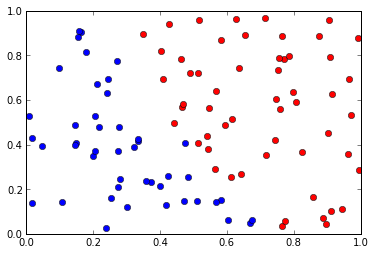

In [5]:
# plotting the data points
cla()
d0 = data[labels==False]
d1 = data[labels]
plot(d0[:,0],d0[:,1],"bo")
plot(d1[:,0],d1[:,1],"ro")
savefig("tmp.png")
print len(d0),len(d1)



If we are only given this data (but not the equation generating it), how can we recover the decision rule?

We can visually read off the equation for the decision boundary.  It should run from (0.15,1.0) to about (0.7,0.0).



43 57

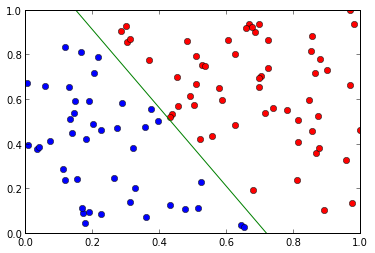

In [8]:
cla()
d0 = data[labels==False]
d1 = data[labels]
xlim((0,1)); ylim((0,1))
plot(d0[:,0],d0[:,1],"bo")
plot(d1[:,0],d1[:,1],"ro")
plot([0.15,0.72],[1.0,0.0],"g") # guess
savefig("tmp.png")
print len(d0),len(d1)

(Linear Decision Boundaries)

Note that these decision boundaries are linear, by construction.  

We have seen other problems with linear decision boundaries, namely the decision boundaries in some cases where the class conditional densities are normal and all the covariance matrices are equal.  

However, in this case, the class conditional densities aren't normal at all, they are uniform densities over quadrilateral regions.

Some problems involving Gaussian densities yield linear decision boundaries, but linear decision boundaries are optimal for many other problems.

How do we find these decision boundaries automatically?

(Decision Rules)

A linear decision boundary is given by a formula of the form:

$$a_1 x_1 + ... + a_n x_n = d$$

We can write this as

$$a \cdot x = d $$

With this, we classify as class 0:

$$a \cdot x \lt d$$

and as class 1:

$$a \cdot x \geq d$$

(Augmented Vectors)

However, it turns out to be inconvenient to have the $d$ in all our equations; we therefore turn this inhomogeneous problem into a homogeneous one by transforming the vectors.

$$ x \rightarrow (1,x) $$

$$ a \rightarrow (-d,x) $$

Now we can write for our decision problem:

$$ a \cdot x \lt 0$$

and

$$a \cdot x \geq 0$$

Therefore, for any inhomogeneous linear decision problem, we can construct an equivalent homogeneous one by simply adding a column of 1's to the data vector

# The Perceptron Learning Algorithm

(Perceptron Correction)

We want $a \cdot x > 0$ for all samples in class 1.  Now, assume that this isn't working for some sample $x$, $a \cdot x \lt 0$ even though it should be $> 0$.  How do we fix that?

Actuall, the solution is fairly simple:

- When $a \cdot x < 0$ when it should be $> 0$, we add "a little bit of $x$" to $a$.  
- That is, we update $a \rightarrow a + \epsilon x$.  
Then, next time, $(a + \epsilon x) \cdot x = a \cdot x + \epsilon ||x||^2 > a \cdot x$.
- For the other case, we subtract a little bit of $x$.

(Halfspace Learning)

But notice that the two cases are symmetrical; instead of considering two classes, we can simplify the problem further by flipping the sign of all the samples in class $0$.  Then, we require for all samples in the transformed problem that $a \cdot x > 0$ (remember that we also augmented the data vector).

So, the perceptron learning algorithm is:

- given input samples $\{x_1,...,x_N\} \subseteq R^n$ and corresponding classifications $\{c_1,...,c_N\} \subseteq \{0,1\}$, first replace all the $x_i$ with augmented vectors $x_i \rightarrow (1,x_i)$
- then, for every sample for which $c_i=0$, negate the corresponding $x_i$, that is $x_i \rightarrow -x_i$
- pick a random starting vector $a$
- repeatedly iterate through the training samples $x_i$
  - if $a \cdot x_i > 0$ then continue
  - otherwise update $a$ according to $a \rightarrow a + \epsilon x_i$
  - stop if there are no more updates

Actually, it turns out that we can just use $\epsilon = 1$.

Let's see whether this works.

In [13]:
# augmenting the original vectors
augmented = concatenate([ones((100,1)),data],axis=1)
flipped = augmented.copy()
flipped[labels==False] = -flipped[labels==False]

In [14]:
# random initialization of weight vector
a = random_sample((3))
a

array([ 0.75842167,  0.94856581,  0.80291539])

In [15]:
# perceptron learning
for epoch in range(100):
    nchanged = 0
    for i in range(len(flipped)):
        if dot(a,flipped[i])>0: continue
        a += flipped[i]
        nchanged += 1
    print (epoch,nchanged),
    if nchanged==0: break
print

(0, 27) (1, 17) (2, 16) (3, 4) (4, 14) (5, 13) (6, 6) (7, 2) (8, 4) (9, 12) (10, 14) (11, 9) (12, 4) (13, 4) (14, 10) (15, 14) (16, 6) (17, 4) (18, 5) (19, 4) (20, 10) (21, 12) (22, 8) (23, 6) (24, 4) (25, 5) (26, 4) (27, 4) (28, 4) (29, 6) (30, 10) (31, 10) (32, 6) (33, 6) (34, 4) (35, 4) (36, 4) (37, 6) (38, 5) (39, 4) (40, 4) (41, 0)


In [16]:
# result of learning
d,a0,a1 = a
print d,a0,a1

-8.24157833466 11.586087424 6.41877706797


(reconstructing the linear equation)

The linear equation is now:

$$a_0 x + a_1 y + d = 0$$

For $x=0$:

$$y = -\frac{d}{a_1}$$

For $y=0$:

$$x = -\frac{d}{a_0}$$

45 55


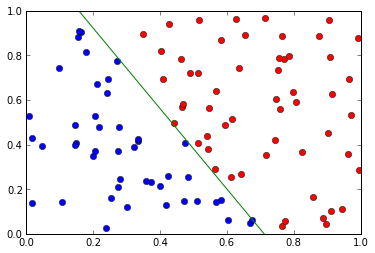

In [17]:
# plotting the learned decision boundary
cla()
d0 = data[labels==False]
d1 = data[labels]
xlim((0,1)); ylim((0,1))
plot(d0[:,0],d0[:,1],"bo")
plot(d1[:,0],d1[:,1],"ro")
plot([0,-d/a0],[-d/a1,0],"g")
savefig("tmp.png")
print len(d0),len(d1)

(Open Questions)

That has worked rather well, but it leaves open a number of questions:a

- Is the algorithm guaranteed to stop?
- How do we deal with more than two classes?
- What is the error rate?
- How does it relate to the c.c.d. $p(x|c)$?
- What happens when the data isn't linearly separable?
- It's fairly easy to show that the algorithm converges if the data is linearly separable. 

# Criterion Functions

(Separating Plane via Criterion Function)

Let's say we know the data is separable and we want to find a weight vector that separates the samples.  We can do this by defining an objective function $J(w)$ and then minimizing $J(w)$.

(Minimum Error Criterion Function)

The obvious objective function to use is $J(w) = \hbox{# misclassified samples}$.  That function is zero when $w$ separates the two classes, and positive otherwise.  Unfortunately, that is a stepwise constant function, which is hard to optimize.

(Perceptron Criterion Function)


A better function is to sum up the total amount by which samples on the wrong side of the decision boundary are misclassified.  This is zero when the data is separated, but positive if any samples are misclassified.  In formulas:

$$J_p(w) = \sum_{i\in{\cal E}_w} -w\cdot x_i$$

where

$${\cal E}_w = \\{ i | w \cdot x \lt 0\\}$$



(Gradient Descent)

We can optimize this function by gradient descent.  That is, we iteratively update the weight vector $w$ by adding a small multiple of the negative of the gradient $\nabla J_p(w)$ to it.  What is the gradient?

$$\nabla J_p(w) = \nabla \sum_{i\in{\cal E}_w} -w\cdot x_i = \sum_{i\in{\cal E}_w} -x_i$$

Therefore, our update rule becomes:

$$ w \leftarrow w + \eta \sum_{i\in{\cal E}_w} x_i$$

(Batch vs Sample Correction)

This is a batch update rule; that is, we add up all the gradients for each misclassified samples, and only then update the total weight vector. That is inefficient and turns out to be unnecessary in this case anyway.

A stochastic gradient descent rule updates after every misclassified sample via

$$ w \leftarrow w + \eta x_i $$

In the case of perceptron learning, this is also called the single sample correction algorithm.

# Proof of Convergence

Let's consider a particularly simple case for the single sample correction perceptron learning algorithm: the case where $\eta = 1$.  

Proving convergence for that case shows that for any separable learning problem, there exists a known sequence of $\eta$ (namely all 1s) that make perceptron learning converge.  We also assume that the training vectors are linearly independent.

Assume that we're updating the weight vector in a sequence of updates; we number the updates as $\tau=1,2,...$ (we don't need to worry about the vectors that are classified correctly).  Let $\hat{w}$ be a solution vector.  Consider now the distance of $w(\tau+1)$ from some multiple of the solution vector (any such multiple is itself a solution):

$$w(\tau+1) - \alpha \hat{w} = (w(\tau)-\alpha \hat{w}) + x_\tau$$

Now square both sides:

$$||w(\tau+1) - \alpha \hat{w}||^2 = ||(w(\tau)-\alpha \hat{w}) + x_\tau||^2 = ||w(\tau)-\alpha \hat{w}||^2 - 2(w(\tau)-\alpha\hat{w})\cdot x_\tau+||x_\tau^2||$$

$$ = ||w(\tau)-\alpha \hat{w}||^2 - 2 w(\tau)\cdot x_\tau - 2 \alpha\hat{w} \cdot x_\tau + ||x_\tau^2||$$

We know that $w(\tau) \cdot x_\tau \lt 0$ because it was misclassified, so

$$||w(\tau+1) - \alpha \hat{w}||^2 \leq ||w(\tau)-\alpha \hat{w}||^2 - 2 \alpha\hat{w} \cdot x_\tau + ||x_\tau^2||$$

We also know that $\hat{w}\cdot x_\tau>0$ (because $\hat{w}$) is a solution.  

So, we can choose some $\alpha$ such that we get a provable reduction in the distance of the weight vector from the true vector.  To choose that, let's bound $||x_\tau^2|| and $\hat{w}\cdot x_\tau$ above and below, respectively.

$$ \beta^2 = \max_i ||x_i||^2$$

$$ \gamma = \min_i \hat{w} \cdot x_i $$

(This is greater than zero for all vectors.)

Now:

$$||w(\tau+1f) - \alpha \hat{w}||^2 \leq ||w(\tau)-\alpha \hat{w}||^2 - 2 \alpha\gamma + \beta^2$$

If we choose $\alpha = \frac{\beta^2}{\gamma}$, then

$$||w(\tau+1) - \alpha \hat{w}||^2 \leq ||w(\tau)-\alpha \hat{w}||^2 - \beta^2$$

This means that after $k$ steps, we have a reduction by $k\beta^2$ in the error.  Since the distance can't become negative, we have a bound on the number of corrections of:

$$\hat{k} = \frac{||w(1) - \alpha \hat{w}||^2}{\beta^2}$$

Let's pick $w(1)=0$, then we get:

$$\hat{k} = \frac{\alpha^2 ||\hat{w}||^2}{\beta^2} = \frac{\beta^2 ||\hat{w}||}{\gamma^2} = \frac{\max_i ||x_i||^2 ||\hat{w}||^2}{(\min_i \hat{w}\cdot x_i)^2}$$

Non-Separable Case
===================

If classes are not separable, things get more difficult.  In fact, it's not even clear what kind of solution we are looking for in that case.

The most obvious solution we might want, the solution that has the minimum number of samples "on the wrong side" of the decision boundary is computationally hard to find.

There are, however, other kinds of criteria we might apply:

- Minimize the perceptron criterion function.
- Find a good "least square approximation", that is, try to minimize $\sum_i |a\cdot x_i - c_i|^2$ (note that we cannot use the sign flip in this case).
- Find a good "least square approximation", for some other objective function, as in $\sum_i f(a \cdot x_i - c_i)$ (note that we cannot use the sign flip in this case).

Multi-Class Case
=================

There are several different approaches we can take to the multiclass case:

- We can transform the classification problem into $n$ 1-vs-rest problems; then, we get $n$ linear functions $g_c(x) = a_c \cdot x$.  We can treat these functions as discriminant functions and use the decision rule $D(x) = \arg\max_c g_c(x) = \arg\max_i a_i \cdot x$.
- We can train $n \choose 2$ different dichotomies for classes.  These dichotomies are not going to be entirely consistent, but we can treat them as a corrupted binary vector of the true dichotomies and perform "error correction".
- We can encode the the $n \choose 2$ dichotomies in a single binary classification problem via Kessler's construction.  That is, let $a = (a_1,...,a_M)$.  we write down for each input vector $x_i$ a series of outputs of different classification problems (Kessler's construction.  This is another way of expressing the previous approach.
- We can consider the classifier as a map from $R^n \rightarrow \{0,1\}^M$, where the output vectors are binary vectors of the special form $y_i = (\delta_{1,c_i},...,\delta_{M,c_i})$ (i.e., all zero except for a 1 in position $c$).  Then, we minimize $e = \sum_i |A \cdot x_i - y_i|^2$.
- We can consider any sufficiently large and complete collection of binary classifiers on the original data (these might include training, say, {8,9,0} vs the rest); this collection then gives us as output a binary vector of classification results.  Instead of trying to write rules manually for mapping these binary vectors into output classes, we can simply use them as input vectors for another classifier.  This is called stacking of classifiers.